In [1]:
import pandas as pd
import numpy as np


In [2]:
df=pd.read_csv("spam_ham_dataset.csv")

In [3]:
df

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\nth...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\n( see a...",0
2,3624,ham,"Subject: neon retreat\nho ho ho , we ' re arou...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\nthis deal is to ...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\nthe transport v...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\nhpl ...,0
5168,2933,ham,Subject: calpine daily gas nomination\n>\n>\nj...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [4]:
# Data Cleaning
# EDA(Exploratory Data analysis)
# Text preprocessing
# Model Bilding
# Evaluation
# Improvement
# Website
# Deploy

In [5]:
# 1. Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [7]:
# rename column

df.rename(columns={"Unnamed: 0": "target",},inplace=True)
df.sample(5)

,target,label,text,label_num
2414,514,ham,Subject: re : deal 144932 ces - lila allen\nye...,0
3481,1624,ham,Subject: revision # 1 - enron / hpl actuals fo...,0
2133,500,ham,"Subject: new arrival ? ?\nhi out there ,\nwell...",0
3033,4045,spam,Subject: need sooooome heelp sometiiiiimes\nhi...,1
1734,1553,ham,Subject: cross training - industrials\nrobert ...,0


In [8]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [9]:
df["label"]=encoder.fit_transform(df["label"])

In [10]:
df.head()

,target,label,text,label_num
0,605,0,Subject: enron methanol ; meter # : 988291\nth...,0
1,2349,0,"Subject: hpl nom for january 9 , 2001\n( see a...",0
2,3624,0,"Subject: neon retreat\nho ho ho , we ' re arou...",0
3,4685,1,"Subject: photoshop , windows , office . cheap ...",1
4,2030,0,Subject: re : indian springs\nthis deal is to ...,0


In [11]:
# missing values
df.isnull().sum()

target       0
label        0
text         0
label_num    0
dtype: int64

In [12]:
# remove duplicates

df.duplicated().sum()

0

In [13]:
df.shape


(5171, 4)

# 2. EDA

In [14]:
df.head()

,target,label,text,label_num
0,605,0,Subject: enron methanol ; meter # : 988291\nth...,0
1,2349,0,"Subject: hpl nom for january 9 , 2001\n( see a...",0
2,3624,0,"Subject: neon retreat\nho ho ho , we ' re arou...",0
3,4685,1,"Subject: photoshop , windows , office . cheap ...",1
4,2030,0,Subject: re : indian springs\nthis deal is to ...,0


In [15]:
df["label"].value_counts()

0    3672
1    1499
Name: label, dtype: int64

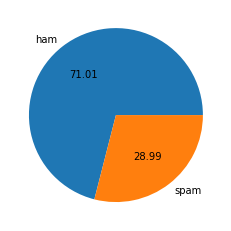

In [16]:
import matplotlib.pyplot as plt
plt.pie(df["label"].value_counts(),labels=["ham","spam"],autopct="%0.2f")
plt.show()

In [17]:
# mail imbalanced

In [18]:


#! pip install nltk

In [19]:
import nltk

In [20]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
df["num_characters"]=df["text"].apply(len)

In [22]:
df.head()

,target,label,text,label_num,num_characters
0,605,0,Subject: enron methanol ; meter # : 988291\nth...,0,322
1,2349,0,"Subject: hpl nom for january 9 , 2001\n( see a...",0,95
2,3624,0,"Subject: neon retreat\nho ho ho , we ' re arou...",0,2515
3,4685,1,"Subject: photoshop , windows , office . cheap ...",1,404
4,2030,0,Subject: re : indian springs\nthis deal is to ...,0,332


In [23]:
# num of words

df["num_words"]=df["text"].apply(lambda x:len(nltk.word_tokenize(x)))

In [24]:
df.head()

,target,label,text,label_num,num_characters,num_words
0,605,0,Subject: enron methanol ; meter # : 988291\nth...,0,322,68
1,2349,0,"Subject: hpl nom for january 9 , 2001\n( see a...",0,95,24
2,3624,0,"Subject: neon retreat\nho ho ho , we ' re arou...",0,2515,551
3,4685,1,"Subject: photoshop , windows , office . cheap ...",1,404,49
4,2030,0,Subject: re : indian springs\nthis deal is to ...,0,332,71


In [25]:
df["num_sentences"]=df["text"].apply(lambda x: len(nltk.sent_tokenize(x)))
df["num_sentences"].head()

0     3
1     1
2    20
3     3
4     3
Name: num_sentences, dtype: int64

In [26]:
df.head()

,target,label,text,label_num,num_characters,num_words,num_sentences
0,605,0,Subject: enron methanol ; meter # : 988291\nth...,0,322,68,3
1,2349,0,"Subject: hpl nom for january 9 , 2001\n( see a...",0,95,24,1
2,3624,0,"Subject: neon retreat\nho ho ho , we ' re arou...",0,2515,551,20
3,4685,1,"Subject: photoshop , windows , office . cheap ...",1,404,49,3
4,2030,0,Subject: re : indian springs\nthis deal is to ...,0,332,71,3


In [27]:

df[["label_num","num_characters","num_words","num_sentences"]].describe()

,label_num,num_characters,num_words,num_sentences
count,5171.000000,5171.00000,5171.000000,5171.000000
mean,0.289886,1029.74531,229.181009,9.999613
std,0.453753,1505.10317,336.487397,21.678645
min,0.000000,10.00000,2.000000,1.000000
25%,0.000000,238.00000,52.000000,3.000000
50%,0.000000,529.00000,122.000000,6.000000
75%,1.000000,1214.00000,283.500000,11.000000
max,1.000000,31860.00000,8863.000000,1163.000000


In [28]:
# ham
df[df["label"] == 0][["label_num","num_characters","num_words","num_sentences"]].describe()

,label_num,num_characters,num_words,num_sentences
count,3672.0,3672.000000,3672.000000,3672.000000
mean,0.0,959.392974,226.239107,8.634259
std,0.0,1360.494244,332.179661,21.912879
min,0.0,17.000000,3.000000,1.000000
25%,0.0,227.000000,51.000000,3.000000
50%,0.0,517.500000,124.000000,5.000000
75%,0.0,1208.000000,294.000000,10.000000
max,0.0,31860.000000,8863.000000,1163.000000


In [29]:
# spam
df[df["label"] == 1][["label_num","num_characters","num_words","num_sentences"]].describe()

,label_num,num_characters,num_words,num_sentences
count,1499.0,1499.000000,1499.000000,1499.000000
mean,1.0,1202.082722,236.387592,13.344229
std,0.0,1800.139488,346.821249,20.724178
min,1.0,10.000000,2.000000,1.000000
25%,1.0,274.000000,55.000000,3.000000
50%,1.0,563.000000,116.000000,7.000000
75%,1.0,1236.500000,244.000000,15.000000
max,1.0,21749.000000,3963.000000,331.000000


In [30]:
#! pip install seaborn

In [31]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

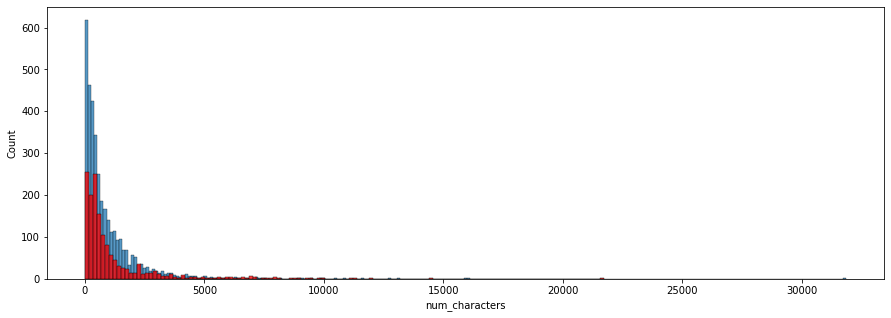

In [32]:
plt.figure(figsize=(15,5))
sns.histplot(df[df["label"] == 0]["num_characters"])
sns.histplot(df[df["label"]== 1]["num_characters"],color="r")

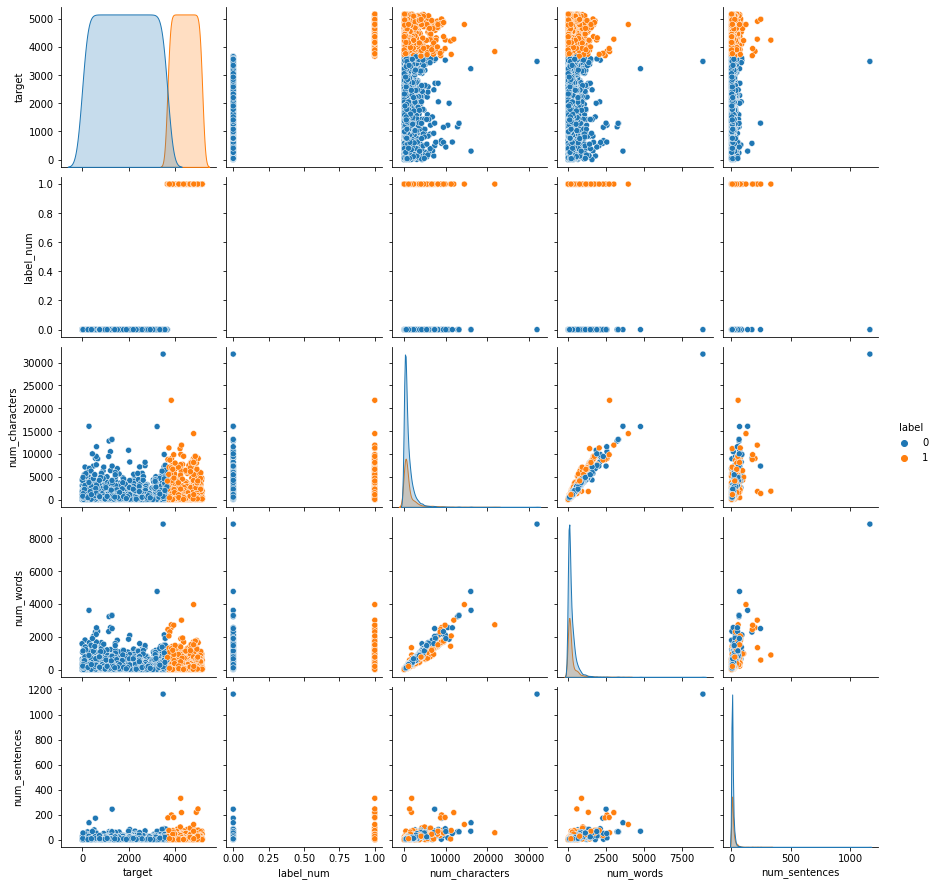

In [33]:
sns.pairplot(df,hue="label")

<AxesSubplot:>

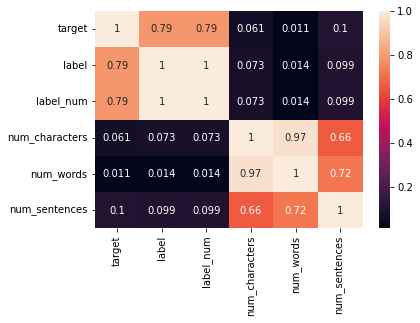

In [34]:
sns.heatmap(df.corr(),annot=True)

In [35]:
# Data preprocessing
 # Lower case
 # Tokenization ###(broken the words)
 # Removing stop words annd punctuation   
 # stemming   
# isalnum(=(removing special characters))

In [36]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    
    y=[]
    
    for i in text:
        if i.isalnum(): # removing special characters
            y.append(i)
            
    text=y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)
            
            
        text=y[:]
        y.clear()
        
        for i in text:
            y.append(ps.stem(i))
    
    
    return y

In [37]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [38]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [39]:
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [40]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [41]:
transform_text("hello, How Are You Friend")

['hello', 'friend']

In [42]:
df["text"][0]

"Subject: enron methanol ; meter # : 988291\nthis is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary\nflow data provided by daren } .\nplease override pop ' s daily volume { presently zero } to reflect daily\nactivity you can obtain from gas control .\nthis change is needed asap for economics purposes ."

In [43]:
#from nltk.stem.porter import PorterStemmer
#ps=PorterStemmer()
ps.stem("loving")

'love'

In [ ]:
df['transformed_text']=df["text"].apply(transform_text)

In [ ]:
print("Helo")